<a href="https://colab.research.google.com/github/ibhardwaj2/CPM/blob/main/Customer_Churn_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT Libraries**

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

***Calling The Dataset ***

In [26]:
df= pd.read_excel('/content/drive/MyDrive/Data/customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


**Print Shape**

In [27]:
print(df.shape)

(100000, 9)


**Check For Missing Values**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


**Check For Duplicated rows**

In [29]:
df.duplicated().sum()

0

**Check For Churn , Location , Gender Catagories**

In [30]:
df['Churn'].value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [31]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [32]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [ ]:
#All Catagories seems to be fairly balanced

**Drop Unwanted Coloums**

In [33]:
df.drop(columns=['CustomerID','Name'],inplace=True)

In [ ]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


**Performing Necessery EDA**

In [34]:
df = df[['Age', 'Gender', 'Location', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn']]

In [35]:
#Summary Statistics
print(df.describe())

                 Age  Subscription_Length_Months   Monthly_Bill  \
count  100000.000000               100000.000000  100000.000000   
mean       44.027020                   12.490100      65.053197   
std        15.280283                    6.926461      20.230696   
min        18.000000                    1.000000      30.000000   
25%        31.000000                    6.000000      47.540000   
50%        44.000000                   12.000000      65.010000   
75%        57.000000                   19.000000      82.640000   
max        70.000000                   24.000000     100.000000   

       Total_Usage_GB          Churn  
count   100000.000000  100000.000000  
mean       274.393650       0.497790  
std        130.463063       0.499998  
min         50.000000       0.000000  
25%        161.000000       0.000000  
50%        274.000000       0.000000  
75%        387.000000       1.000000  
max        500.000000       1.000000  


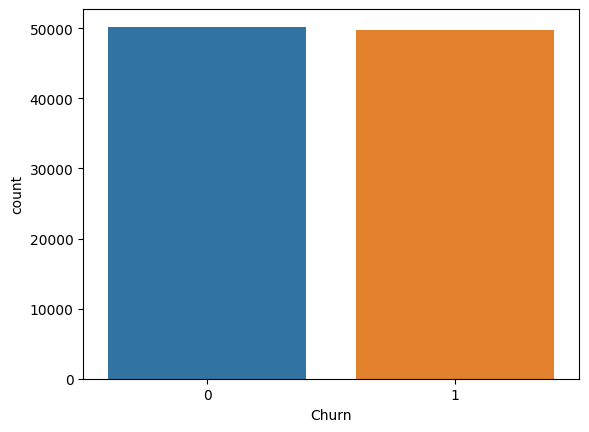

In [36]:
#Visualize the distribution of the target variable (Churn)
sns.countplot(x='Churn', data=df)
plt.show()

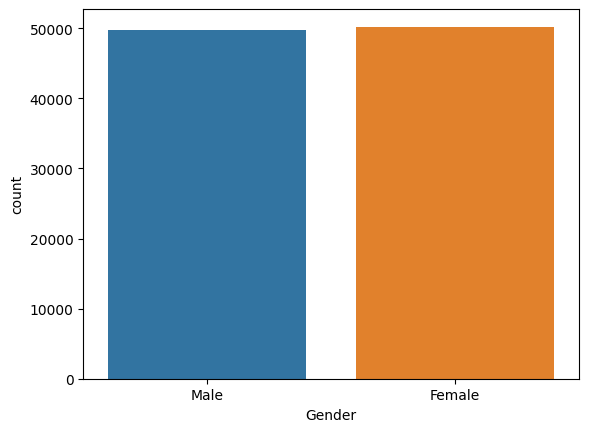

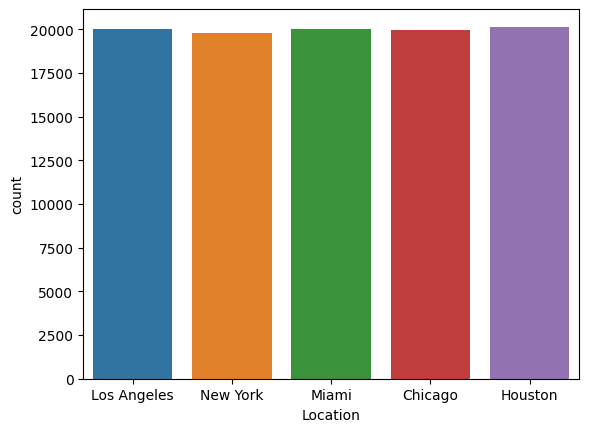

In [37]:
#Visualize the distribution of categorical variables
categorical_cols = ['Gender', 'Location']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()

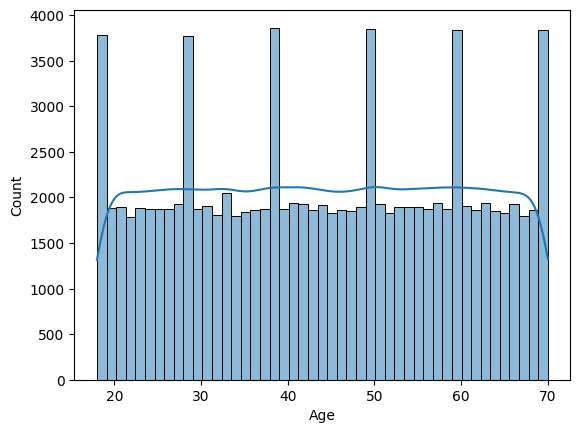

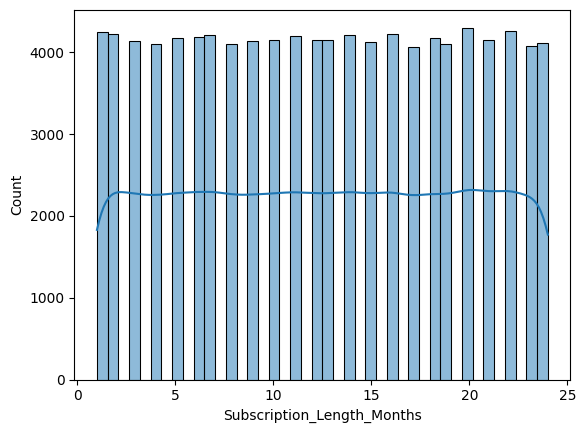

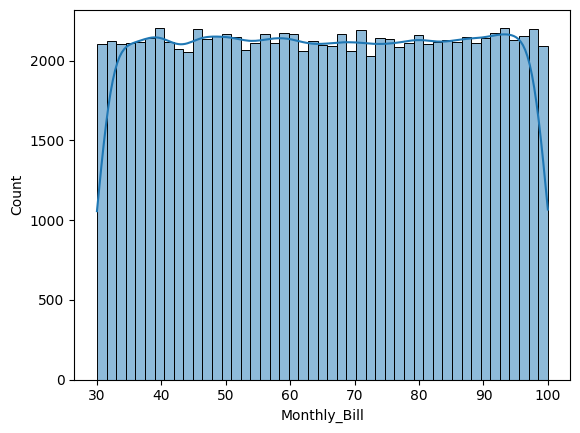

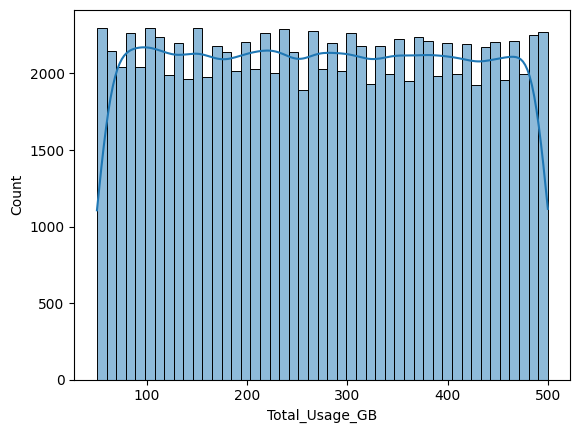

In [38]:
#Visualize the distribution of numerical variables
numerical_cols = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.show()


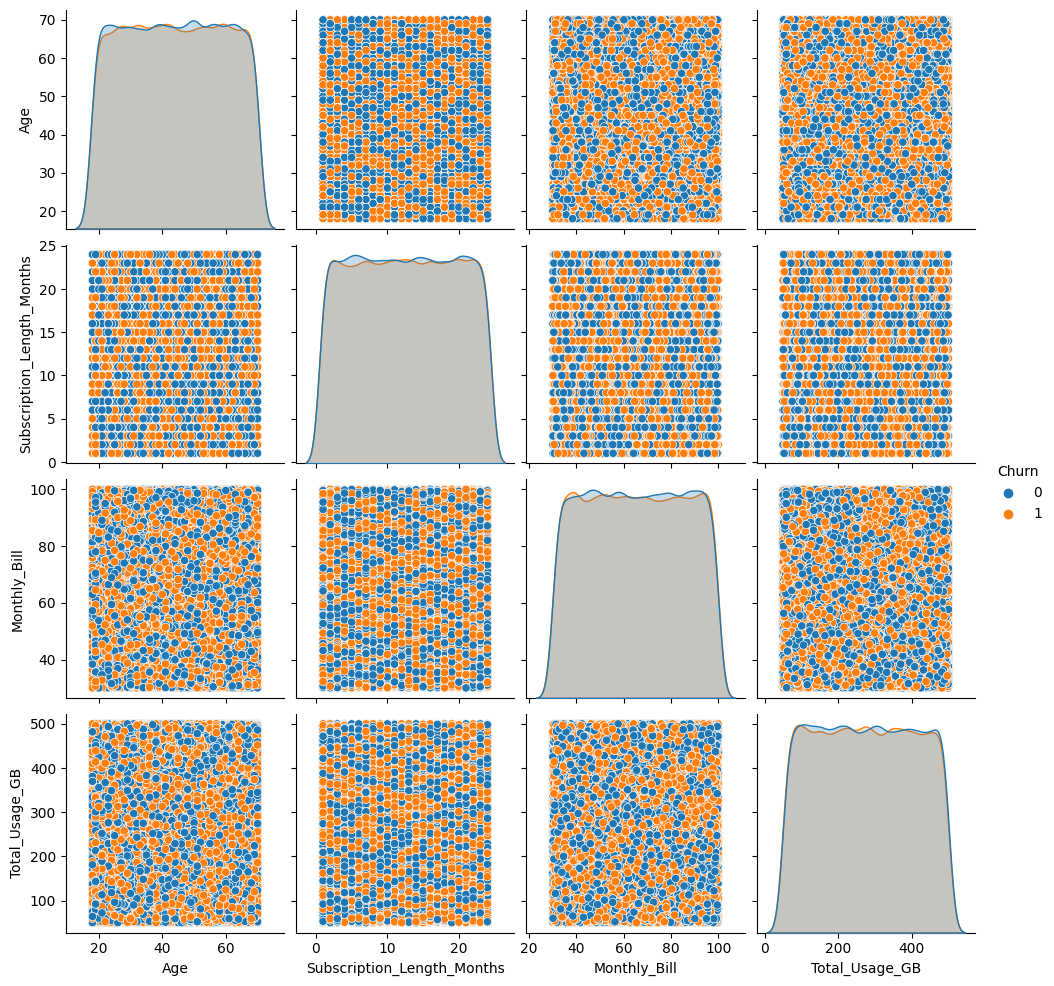

In [40]:
 #Explore the relationship between variables
sns.pairplot(df, hue='Churn')
plt.show()

**ONE HOT ENCODING Catagorical Columns**

In [41]:
df = pd.get_dummies(df,columns=['Location','Gender'],drop_first=True)

In [42]:
df

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Male
0,63,17,73.36,236,0,0,1,0,0,1
1,62,1,48.76,172,0,0,0,0,1,0
2,24,5,85.47,460,0,0,1,0,0,0
3,36,3,97.94,297,1,0,0,1,0,0
4,46,19,58.14,266,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
99995,33,23,55.13,226,1,1,0,0,0,1
99996,62,19,61.65,351,0,0,0,0,1,0
99997,64,17,96.11,251,1,0,0,0,0,1
99998,51,20,49.25,434,1,0,0,0,1,0


In [61]:
#Now all the data we have is numerical so now we can build our model

**Build The Model**

In [62]:
#Before model building we will scale our models

In [129]:
X = df.drop(columns=['Churn'])#We will temporarily drop last column and store rest in x
y = df['Churn'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)# Here We give it random 90% of our data for training and 10% for testing

In [134]:
X_train.shape #Random 90000 entries to train my model with 9 input columns

(80000, 9)

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)#Creating a new variable and passing X_train
X_test_scaled = scaler.transform(X_test)

In [136]:
#it will give us transformed values

In [137]:
X_train_scaled #we can see its an 2D array inside which each array is a customer

array([[-0.06505099,  0.07499567,  0.80146548, ..., -0.5009178 ,
         2.0116366 , -0.99638155],
       [-0.45772275, -1.07956099, -0.68072045, ..., -0.5009178 ,
        -0.49710768, -0.99638155],
       [-0.71950393,  0.50795442,  0.97932779, ..., -0.5009178 ,
         2.0116366 , -0.99638155],
       ...,
       [ 0.98207372,  1.37387192, -0.21185563, ..., -0.5009178 ,
         2.0116366 , -0.99638155],
       [ 0.58940195,  0.94091317, -1.35659723, ...,  1.99633552,
        -0.49710768,  1.00363159],
       [ 0.39306607, -1.36820016, -1.50580395, ...,  1.99633552,
        -0.49710768,  1.00363159]])

In [138]:
#Now Applying Keras

In [139]:
import tensorflow

In [140]:
from tensorflow import keras

In [141]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [142]:
#now we build our model

In [143]:
model=Sequential()#We are making a sequential object

In [144]:
#Now we will make layers one is input layer , one is output layer and one is hidden layer(3 perceptrons)

In [172]:
model.add(Dense(10,activation='relu',input_dim=9))#Since our input layer is connected to the hidden layer so we need to tell it how many inputsit get 9 in our case coz 8 input columns
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))#Output layer having 1 layer with activation sigmoid now i used relu to improve the accuracy of the model and also added one more hidden layer and also increased the nodes

In [146]:
#For summary of our model run the summary function

In [173]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 3)                 30        
                                                                 
 dense_11 (Dense)            (None, 1)                 4         
                                                                 
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 11)                121       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 187 (748.00 Byte)
Trainable params: 187 (748.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [183]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])#Compilation Stage Log Loss function

In [184]:
history=model.fit(X_train_scaled,y_train,epochs=50,validation_split=0.2)#we will fit our model, now we increased epochs and also taking a validation_split now my model is running on 80000-20000 customers and it will also tell me the accuracy

Epoch 1/50
2000/2000 [==============================] - 15s 7ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 3/50
2000/2000 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 4/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 5/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4969
Epoch 6/50
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 7/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.5001 - val_loss: 0.6932 - val_accuracy

In [179]:
#To see where these weights are biases are stored

In [185]:
model.layers[0].get_weights()

[array([[-0.12303674, -0.6196904 , -0.7451899 ],
        [-0.31049538,  0.32130522,  0.47571754],
        [ 0.04494376, -0.04732717, -0.0976551 ],
        [-0.55530334, -0.0101547 ,  0.08268137],
        [ 0.12425701,  0.05597221,  0.37094888],
        [-0.22472504,  0.20657092,  0.37525296],
        [ 0.49363384,  0.16375439, -0.18891428],
        [ 0.8680768 ,  0.16681853, -0.10477275],
        [ 0.09823393,  0.27576542,  0.25106364]], dtype=float32),
 array([ 0.140287  ,  0.07438246, -0.05264013], dtype=float32)]

In [186]:
model.layers[1].get_weights()

[array([[-0.26301187],
        [ 0.6415491 ],
        [-0.6220946 ]], dtype=float32),
 array([-0.04117465], dtype=float32)]

In [187]:
#Now We will do prediction for our test sets

In [188]:
y_log=model.predict(X_train_scaled)

2500/2500 [==============================] - 4s 1ms/step


In [189]:
#sINCE WE ARE USING SIGMOID  and in sigmoid values from 0-1 is a probability

In [190]:
#So we need to convert it to 0 and 1, We need to find the threshold By plotting RUC AUC curve

In [191]:
from sklearn.metrics import roc_curve, auc

In [192]:
# Predict probabilities
y_probs = model.predict(X_test_scaled)

625/625 [==============================] - 1s 1ms/step


In [193]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

In [194]:
# Find optimal threshold
j_statistic = tpr - fpr
optimal_threshold = thresholds[np.argmax(j_statistic)]

In [195]:
#Since we have found the optimal threshold now we will convert the values
y_pred=np.where(y_log>0.5112443566322327,1,0)

In [196]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [164]:
#Check for Accuracy

625/625 [==============================] - 1s 1ms/step


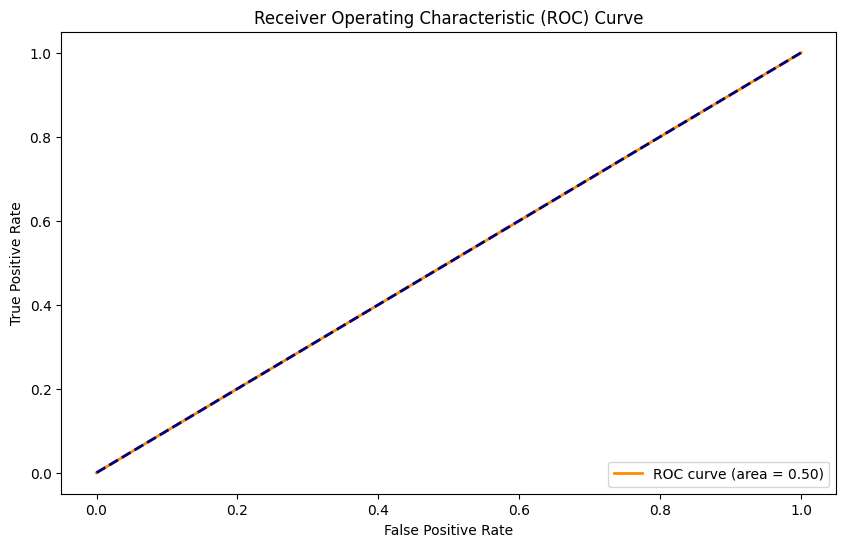

Optimal Threshold: 1.4966551065444946
Accuracy: 0.50455


In [197]:
y_probs = model.predict(X_test_scaled)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
j_statistic = tpr - fpr
optimal_threshold = thresholds[np.argmax(j_statistic)]
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f'Optimal Threshold: {optimal_threshold}')

# Calculate y_pred using the optimal threshold
y_pred = np.where(y_probs > optimal_threshold, 1, 0)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')

In [198]:
history #history is an object

In [199]:
history.history #we get a dictionary of key 4 value pairs

{'loss': [0.6931810975074768,
  0.693177342414856,
  0.6931812763214111,
  0.6931696534156799,
  0.6931744813919067,
  0.6931691765785217,
  0.6931621432304382,
  0.6931747198104858,
  0.6931729912757874,
  0.6931729912757874,
  0.6931782960891724,
  0.6931779384613037,
  0.6931630969047546,
  0.6931722164154053,
  0.6931682229042053,
  0.693181574344635,
  0.6931799054145813,
  0.6931635737419128,
  0.6931705474853516,
  0.693177342414856,
  0.6931730508804321,
  0.6931774616241455,
  0.6931669116020203,
  0.693177342414856,
  0.6931805610656738,
  0.6931686401367188,
  0.6931732296943665,
  0.6931599974632263,
  0.69317626953125,
  0.6931582689285278,
  0.6931635141372681,
  0.6931761503219604,
  0.6931706070899963,
  0.6931810975074768,
  0.6931560635566711,
  0.6931670904159546,
  0.6931906342506409,
  0.6931735277175903,
  0.6931776404380798,
  0.6931771039962769,
  0.6931462287902832,
  0.6931588649749756,
  0.6931711435317993,
  0.6931620836257935,
  0.6931631565093994,
  0.6931

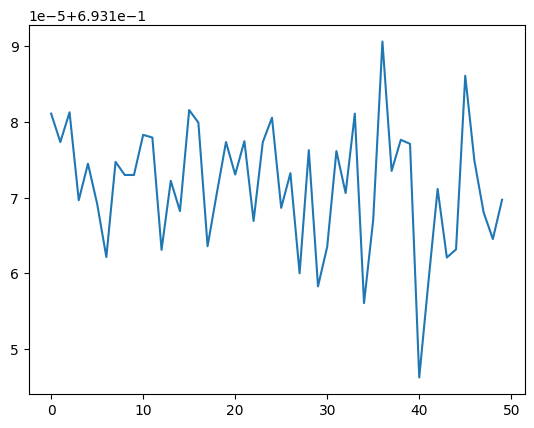

In [200]:
#We will plot 2 graphs
plt.plot(history.history['loss'])#Trend in our training error loss we can also compare it with validation loss

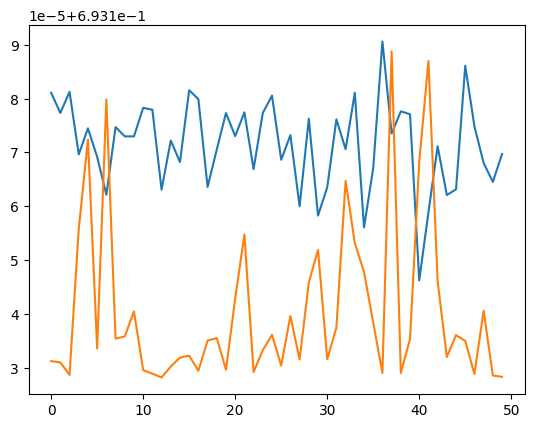

In [202]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [203]:
#Same set of graphs for accuracy

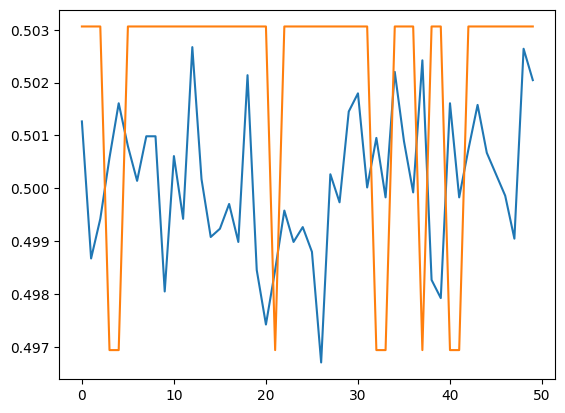

In [204]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#We can use some concept regularization , dropout etc